# Random Forest Analysis

## What Features are important in predicting third down conversion? 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn import tree

In [107]:
df = pd.read_csv("../thirdDown.csv")

df = df.drop(columns=['pass_length.1', 'Unnamed: 0'])

len(df)



46877

#### Data preprocessing

In [108]:
# one hot encode to change categorical values to 
df = pd.get_dummies(df) 
df.head()

,play_id,game_id,shotgun,no_huddle,ydstogo,yardline_100,half_seconds_remaining,down,score_differential,fg_prob,td_prob,ep,third_down_converted,play_type_pass,play_type_run,pass_length_deep,pass_length_short,run_location_left,run_location_middle,run_location_right
0,190,2018090600,1,0,10,39.0,1681.0,3.0,0.0,0.415009,0.333712,2.250232,1.0,1,0,1,0,0,0,0
1,256,2018090600,1,0,1,1.0,1559.0,3.0,0.0,0.204515,0.749825,5.661931,0.0,1,0,0,1,0,0,0
2,344,2018090600,1,0,4,92.0,1464.0,3.0,0.0,0.093928,0.213978,-1.832560,0.0,1,0,0,1,0,0,0
3,445,2018090600,1,0,5,39.0,1404.0,3.0,0.0,0.395592,0.377457,2.642543,1.0,0,1,0,0,0,0,1
4,636,2018090600,1,0,3,3.0,1207.0,3.0,0.0,0.386222,0.567801,4.926552,0.0,1,0,0,1,0,0,0


In [109]:
target = df['third_down_converted']
target_names = ["not_converted", "converted"]


In [110]:
data = df.drop(['third_down_converted', 'play_id', 'game_id'], axis=1)
feature_names = data.columns
data = np.array(data)


#### Test/Train split

In [111]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size =0.25, random_state=42)


#### Descision Tree and Random Forest Models

In [112]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.600938566552901

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [116]:
rf.score(X_test, y_test)

0.6424914675767918

#### confusion matrix

In [118]:
y_predicted = rf.predict(X_test)

In [119]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted))
print()
print("Classification Report")
print(classification_report(y_test, y_predicted))

Confusion Matrix:
[[5279 1835]
 [2355 2251]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.69      0.74      0.72      7114
         1.0       0.55      0.49      0.52      4606

   micro avg       0.64      0.64      0.64     11720
   macro avg       0.62      0.62      0.62     11720
weighted avg       0.64      0.64      0.64     11720



Text(69.0, 0.5, 'Truth')

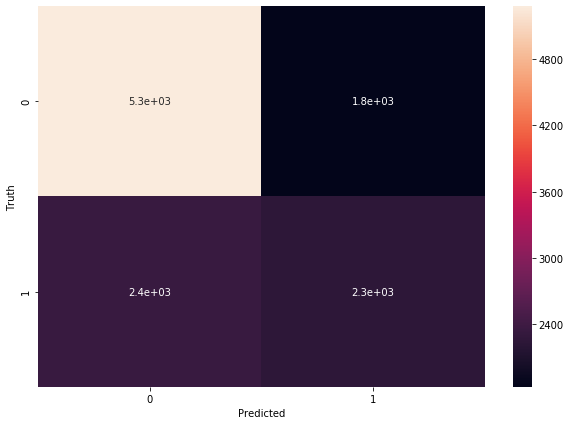

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Sorting features by importance weight

In [122]:
# Listing feature importance weighting
feature_imp = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
feature_imp

td_prob                   0.162321
ep                        0.147680
fg_prob                   0.146971
half_seconds_remaining    0.146904
score_differential        0.114738
ydstogo                   0.106541
yardline_100              0.087866
pass_length_short         0.024774
pass_length_deep          0.018026
shotgun                   0.010602
no_huddle                 0.008764
play_type_pass            0.007274
play_type_run             0.006808
run_location_left         0.003668
run_location_middle       0.003654
run_location_right        0.003408
down                      0.000000
dtype: float64

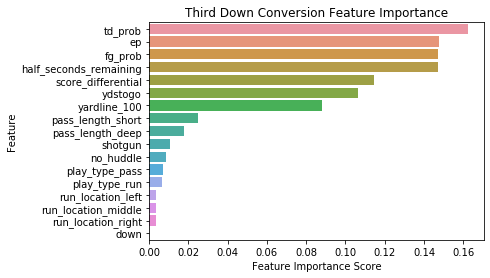

In [123]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Third Down Conversion Feature Importance")

plt.show()

## What Features are important in predicting whether a third down run or pass play(no constraints)?

In [126]:
df2 = pd.read_csv("../thirdDown.csv")
df2 = df2.drop(columns=['pass_length.1', 'Unnamed: 0'])

len(df2)


46877

#### Data preprocessing 

In [127]:
#Encode Play Type so that the column contains numerical codes.
from sklearn.preprocessing import LabelEncoder
le_play_type = LabelEncoder()





In [128]:
df2['play_type_n'] = le_play_type.fit_transform(df2['play_type'])


                                                
list(df2.columns)

['play_id',
 'game_id',
 'shotgun',
 'no_huddle',
 'ydstogo',
 'yardline_100',
 'play_type',
 'half_seconds_remaining',
 'down',
 'pass_length',
 'run_location',
 'score_differential',
 'fg_prob',
 'td_prob',
 'ep',
 'third_down_converted',
 'play_type_n']

In [129]:
# Set features and label to predict.
features = df2.drop(['play_type_n', 'play_id', 'game_id', 'pass_length', 'run_location', 'play_type'], axis=1)
feature_names2 = features.columns
# features = np.array(features)
feature_names2



Index(['shotgun', 'no_huddle', 'ydstogo', 'yardline_100',
       'half_seconds_remaining', 'down', 'score_differential', 'fg_prob',
       'td_prob', 'ep', 'third_down_converted'],
      dtype='object')

In [130]:
label = df2['play_type_n']

#### Test/Train split

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size =0.30, random_state=42)

#### Random Forest Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=300)
rf2.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [133]:
rf2.score(X_test, y_test)

0.8511092150170648

#### Confusion Matrix

In [135]:
y_predicted = rf2.predict(X_test)

In [136]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted))
print()
print("Classification Report")
print(classification_report(y_test, y_predicted))

Confusion Matrix:
[[10611   595]
 [ 1499  1359]]

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11206
           1       0.70      0.48      0.56      2858

   micro avg       0.85      0.85      0.85     14064
   macro avg       0.79      0.71      0.74     14064
weighted avg       0.84      0.85      0.84     14064



Text(69.0, 0.5, 'Truth')

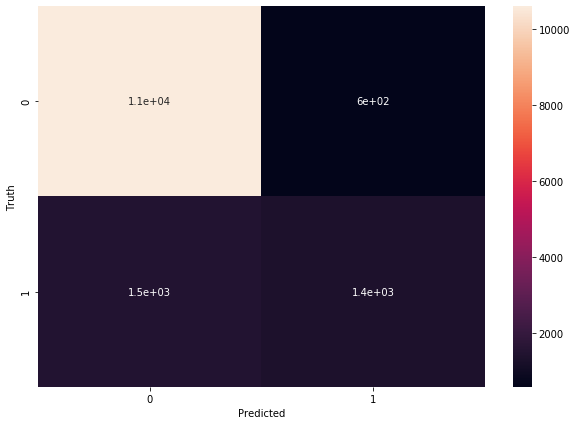

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Sorting features by importance weight

In [138]:
feature_imp2 = pd.Series(rf2.feature_importances_, index=feature_names2).sort_values(ascending=False)
feature_imp2

td_prob                   0.155520
ydstogo                   0.147366
half_seconds_remaining    0.130070
shotgun                   0.129944
ep                        0.125123
fg_prob                   0.122270
score_differential        0.096070
yardline_100              0.073235
third_down_converted      0.013885
no_huddle                 0.006516
down                      0.000000
dtype: float64

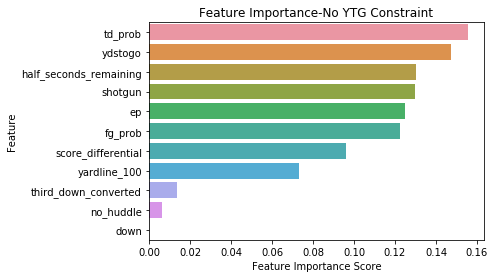

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plot = sns.barplot(x=feature_imp2, y=feature_imp2.index)

plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance-No YTG Constraint")
plt.savefig('passRun-feature-imp.png')
plt.show()

## What features are important in predicting run or pass play on third and short (<= 3 yards)?

In [140]:
df3 = pd.read_csv("../thirdDown.csv")

df3 = df3.drop(columns=['pass_length.1', 'Unnamed: 0'])

df3 = df3[df3.ydstogo<=3]

len(df3)


12657

#### Data preprocessing 

In [141]:
#Encode Play Type so that the column contains numerical codes.
from sklearn.preprocessing import LabelEncoder
le_play_type = LabelEncoder()

In [142]:

df3['play_type_n'] = le_play_type.fit_transform(df3['play_type'])


                                                
list(df3.columns)

['play_id',
 'game_id',
 'shotgun',
 'no_huddle',
 'ydstogo',
 'yardline_100',
 'play_type',
 'half_seconds_remaining',
 'down',
 'pass_length',
 'run_location',
 'score_differential',
 'fg_prob',
 'td_prob',
 'ep',
 'third_down_converted',
 'play_type_n']

In [143]:
# Set features and label to predit
features3 = df3.drop(['play_type_n', 'play_id', 'game_id', 'pass_length', 'run_location', 'play_type'], axis=1)
feature_names3 = features3.columns

feature_names3

Index(['shotgun', 'no_huddle', 'ydstogo', 'yardline_100',
       'half_seconds_remaining', 'down', 'score_differential', 'fg_prob',
       'td_prob', 'ep', 'third_down_converted'],
      dtype='object')

In [144]:
label3 = df3['play_type_n']

#### Test/Train split

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features3, label3, test_size =0.30, random_state=42)

In [146]:
from sklearn.ensemble import RandomForestClassifier
rf3 = RandomForestClassifier(n_estimators=300)
rf3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [147]:
rf3.score(X_test, y_test)

0.7306477093206951

#### confusion matrix

In [148]:
y_predicted = rf3.predict(X_test)

In [149]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted))
print()
print("Classification Report")
print(classification_report(y_test, y_predicted))

Confusion Matrix:
[[1599  468]
 [ 555 1176]]

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2067
           1       0.72      0.68      0.70      1731

   micro avg       0.73      0.73      0.73      3798
   macro avg       0.73      0.73      0.73      3798
weighted avg       0.73      0.73      0.73      3798



Text(69.0, 0.5, 'Truth')

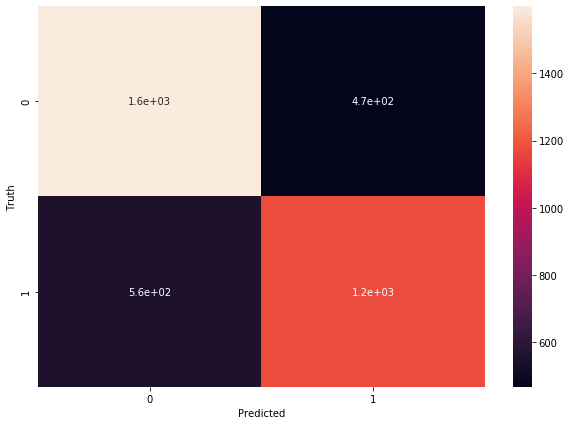

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Sorting feature by importance weight

In [151]:
feature_imp3 = pd.Series(rf3.feature_importances_, index=feature_names3).sort_values(ascending=False)
feature_imp3

td_prob                   0.145190
ydstogo                   0.134772
half_seconds_remaining    0.133216
ep                        0.129464
shotgun                   0.127437
fg_prob                   0.123822
score_differential        0.103371
yardline_100              0.074695
third_down_converted      0.019099
no_huddle                 0.008934
down                      0.000000
dtype: float64

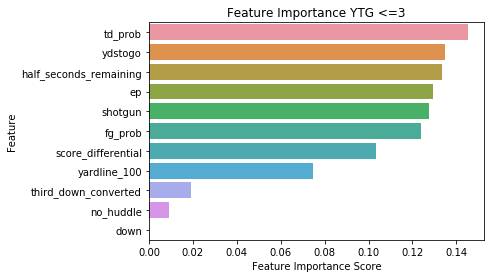

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plot = sns.barplot(x=feature_imp3, y=feature_imp3.index)

plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance YTG <=3")
# plt.savefig('passRun-feature-imp.png')
plt.show()

# What features are important in predicting run or pass play on 3rd and <=1

In [153]:
df4 = pd.read_csv("../thirdDown.csv")

df4 = df4.drop(columns=['pass_length.1', 'Unnamed: 0'])

df4 = df4[df4.ydstogo<=1]

len(df4)


5290

#### Data preprocessing 

In [154]:
#Encode Play Type so that the column contains numerical codes.
from sklearn.preprocessing import LabelEncoder
le_play_type = LabelEncoder()

In [155]:

df4['play_type_n'] = le_play_type.fit_transform(df4['play_type'])


                                                
list(df4.columns)

['play_id',
 'game_id',
 'shotgun',
 'no_huddle',
 'ydstogo',
 'yardline_100',
 'play_type',
 'half_seconds_remaining',
 'down',
 'pass_length',
 'run_location',
 'score_differential',
 'fg_prob',
 'td_prob',
 'ep',
 'third_down_converted',
 'play_type_n']

In [156]:
# Set features and label to predit
features4 = df4.drop(['play_type_n', 'play_id', 'game_id', 'pass_length', 'run_location', 'play_type'], axis=1)
feature_names4 = features4.columns

feature_names4

Index(['shotgun', 'no_huddle', 'ydstogo', 'yardline_100',
       'half_seconds_remaining', 'down', 'score_differential', 'fg_prob',
       'td_prob', 'ep', 'third_down_converted'],
      dtype='object')

In [157]:
label4 = df4['play_type_n']

#### Test/Train split

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features4, label4, test_size =0.30, random_state=42)

In [159]:
from sklearn.ensemble import RandomForestClassifier
rf4 = RandomForestClassifier(n_estimators=300)
rf4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [160]:
rf4.score(X_test, y_test)

0.722117202268431

#### confusion matrix

In [161]:
y_predicted = rf4.predict(X_test)

In [162]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted))
print()
print("Classification Report")
print(classification_report(y_test, y_predicted))

Confusion Matrix:
[[173 279]
 [162 973]]

Classification Report
              precision    recall  f1-score   support

           0       0.52      0.38      0.44       452
           1       0.78      0.86      0.82      1135

   micro avg       0.72      0.72      0.72      1587
   macro avg       0.65      0.62      0.63      1587
weighted avg       0.70      0.72      0.71      1587



Text(69.0, 0.5, 'Truth')

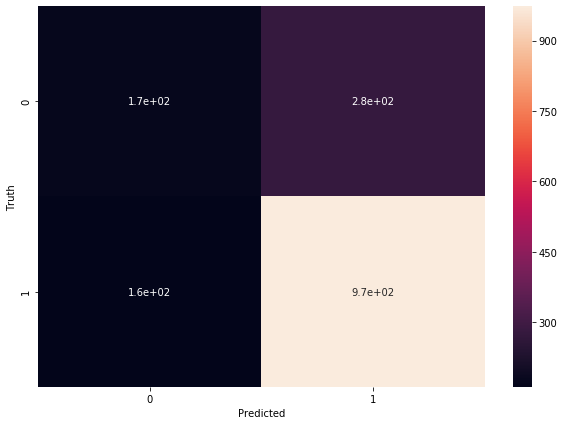

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Sorting feature by importance weight

In [164]:
feature_imp4 = pd.Series(rf4.feature_importances_, index=feature_names4).sort_values(ascending=False)
feature_imp4

half_seconds_remaining    0.175023
td_prob                   0.156305
fg_prob                   0.151725
ep                        0.150161
score_differential        0.123795
shotgun                   0.114977
yardline_100              0.090982
third_down_converted      0.024623
no_huddle                 0.012409
down                      0.000000
ydstogo                   0.000000
dtype: float64

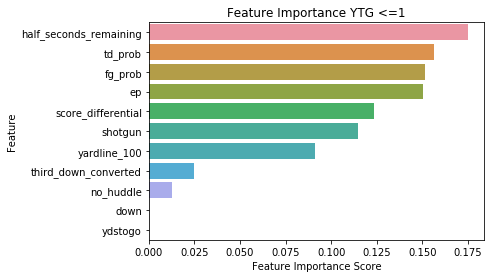

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plot = sns.barplot(x=feature_imp4, y=feature_imp4.index)

plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance YTG <=1")
# plt.savefig('passRun-feature-imp.png')
plt.show()